In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-11 10:20:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-11 10:20:33 (84.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import *
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import os
import random

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-11 10:20:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   297MB/s    in 0.5s    

2023-06-11 10:20:37 (297 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data('10_food_classes_10_percent.zip')

In [5]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [6]:
dir_path_1='10_food_classes_10_percent'
train_dir_path_1=dir_path_1+'/train'
test_dir_path_1=dir_path_1+'/test'

In [7]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_path_1,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=BATCH_SIZE)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_path_1,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=BATCH_SIZE)
                                                                 

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images,labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.82759079e+02 1.57759079e+02 1.17759087e+02]
   [1.80118622e+02 1.55118622e+02 1.15118622e+02]
   [1.79952652e+02 1.54952652e+02 1.14952644e+02]
   ...
   [1.02494637e+02 8.31262894e+01 5.14209671e+01]
   [1.09444069e+02 8.54440689e+01 5.74440651e+01]
   [1.11986595e+02 8.79865952e+01 5.99865990e+01]]

  [[1.83798950e+02 1.58798950e+02 1.18798950e+02]
   [1.84929047e+02 1.59929047e+02 1.19929054e+02]
   [1.88498566e+02 1.63498566e+02 1.23498566e+02]
   ...
   [1.03436752e+02 8.41420746e+01 5.22157478e+01]
   [1.09404518e+02 8.64045181e+01 5.54045143e+01]
   [1.11629456e+02 8.86294556e+01 5.76294556e+01]]

  [[1.85076370e+02 1.60076370e+02 1.19862083e+02]
   [1.80729752e+02 1.55729752e+02 1.15515465e+02]
   [1.84234695e+02 1.59234695e+02 1.19020409e+02]
   ...
   [1.03073669e+02 8.39263306e+01 5.20000000e+01]
   [1.05586479e+02 8.38884277e+01 5.28884277e+01]
   [1.09200882e+02 8.66294556e+01 5.56294556e+01]]

  ...

  [[9.07007828e+01 2.33438816e+01 2.89153538e+01]
   [9

In [10]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 [==============================] - 0s 0us/step


In [11]:
base_model.trainable=False

In [12]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')
x =  tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D:{x.shape}')
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name='output_layer')(x)
model_1 = tf.keras.Model(inputs,outputs)

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)


In [13]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])
model_1_history=model_1.fit(train_data_10_percent,
                            epochs=5,
                            steps_per_epoch=len(train_data_10_percent),
                            validation_data=test_data_10_percent,
                            validation_steps=int(0.25 * len(test_data_10_percent)),
                            callbacks=[create_tensorboard_callback('transfer_learning',
                                                                 'food_vision')])

Saving TensorBoard log files to: transfer_learning/food_vision/20230611-102049


Epoch 1/5
24/24 [==============================] - 33s 428ms/step - loss: 1.3871 - accuracy: 0.5800 - val_loss: 0.6830 - val_accuracy: 0.8306
Epoch 2/5
24/24 [==============================] - 8s 317ms/step - loss: 0.5631 - accuracy: 0.8453 - val_loss: 0.5132 - val_accuracy: 0.8569
Epoch 3/5
24/24 [==============================] - 8s 293ms/step - loss: 0.3934 - accuracy: 0.9053 - val_loss: 0.4816 - val_accuracy: 0.8470
Epoch 4/5
24/24 [==============================] - 9s 360ms/step - loss: 0.3008 - accuracy: 0.9373 - val_loss: 0.4438 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 9s 328ms/step - loss: 0.2488 - accuracy: 0.9480 - val_loss: 0.4149 - val_accuracy: 0.8783


In [14]:
model_1.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 91ms/step - loss: 0.4016 - accuracy: 0.8788


[0.40164095163345337, 0.8787999749183655]

In [15]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [16]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


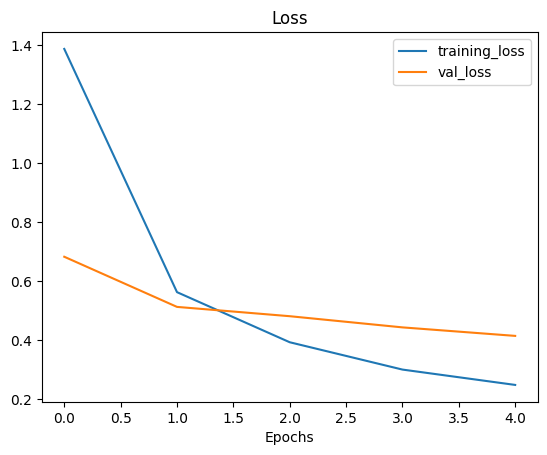

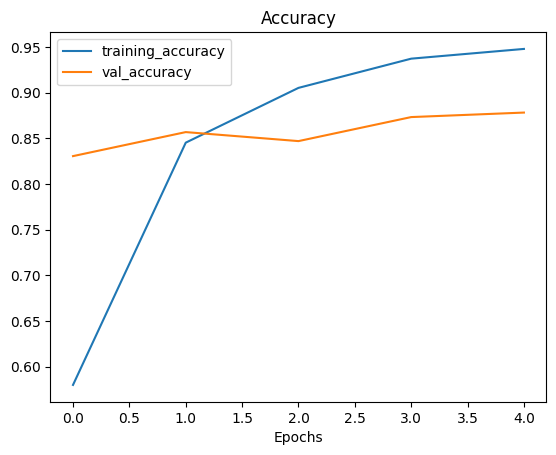

In [17]:
plot_loss_curves(model_1_history)

In [18]:
input_shape = (1,4,4,3)
tf.random.set_seed(100)
input_tensor = tf.random.normal(input_shape)
print(input_tensor)

tf.Tensor(
[[[[ 0.16052227 -1.6597689  -1.2321332 ]
   [ 0.5971658   1.0609884  -1.3277572 ]
   [-0.27911443 -0.02141875 -1.502249  ]
   [ 0.3066489   0.5355358  -1.3167298 ]]

  [[ 0.7335615  -1.1566194   1.6611129 ]
   [ 0.974669   -0.10358131  2.0585718 ]
   [-2.1600595  -0.71011245 -1.4161334 ]
   [-0.61227006 -0.25455204 -0.18277623]]

  [[-0.93512297 -0.74408674  0.8501864 ]
   [-0.8065856  -0.98049253 -0.64699364]
   [-1.0293618  -0.81056195 -0.6525119 ]
   [ 0.5092518   1.5420486   1.4433792 ]]

  [[-0.7556428   0.16503793  1.7515934 ]
   [ 0.7455662  -1.0259658  -0.6619861 ]
   [-0.1748678  -0.16981219 -0.27549365]
   [ 1.3250043  -1.6597811  -1.1208092 ]]]], shape=(1, 4, 4, 3), dtype=float32)


In [19]:
global_average_pooled_tensor =  tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(global_average_pooled_tensor)

tf.Tensor([[-0.0875397  -0.3745714  -0.16067061]], shape=(1, 3), dtype=float32)


In [20]:
tf.reduce_mean(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.0875397 , -0.3745714 , -0.16067061]], dtype=float32)>

In [21]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2023-06-11 10:22:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 142.251.171.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   165MB/s    in 0.8s    

2023-06-11 10:22:11 (165 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
dir_path_2 = '10_food_classes_1_percent'
train_dir_path_2 = dir_path_2 + '/train'
test_dir_path_2 = dir_path_2 + '/test'

In [23]:
walk_through_dir(dir_path_2)

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [24]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_path_2,
                                                              image_size=  IMG_SIZE,
                                                              batch_size = BATCH_SIZE,
                                                              label_mode='categorical')

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_path_2,
                                                              image_size=  IMG_SIZE,
                                                              batch_size = BATCH_SIZE,
                                                              label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
data_augmentation = tf.keras.Sequential(name='data_augmentation')
data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.2))
data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomHeight(0.2))
data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomWidth(0.2))

In [26]:
target_class = random.choice(train_data_1_percent.class_names)

In [27]:
target_dir=train_dir_path_2 + '/' + target_class

In [28]:
random_image = random.choice(os.listdir(target_dir))

In [29]:
random_image_path = target_dir + '/' + random_image

In [30]:
img = mpimg.imread(random_image_path)

(-0.5, 467.5, 447.5, -0.5)

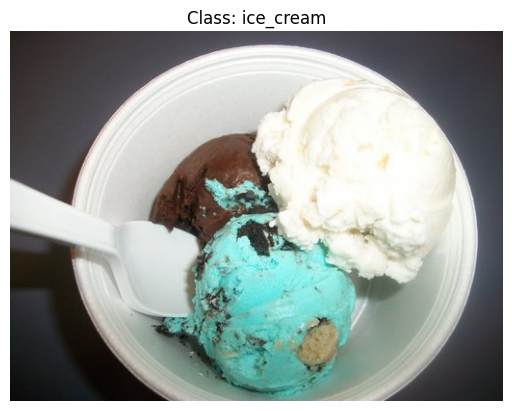

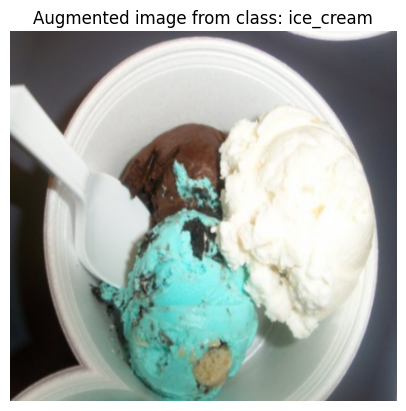

In [31]:
plt.imshow(img)
plt.title(f'Class: {target_class}')
plt.axis(False)
augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training= True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'Augmented image from class: {target_class}')
plt.axis(False)

In [32]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(input_shape, name= 'input_layer')
x = data_augmentation(inputs, training = True)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs =  tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_2=tf.keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])
model_2_history = model_2.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data_1_percent,
                              validation_steps=len(test_data_1_percent),
                              callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_data_augmented')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20230611-102219
Epoch 1/5
3/3 [==============================] - 101s 43s/step - loss: 2.3575 - accuracy: 0.1286 - val_loss: 2.1084 - val_accuracy: 0.2444
Epoch 2/5
3/3 [==============================] - 28s 14s/step - loss: 1.7125 - accuracy: 0.6286 - val_loss: 1.8157 - val_accuracy: 0.4300
Epoch 3/5
3/3 [==============================] - 25s 12s/step - loss: 1.2368 - accuracy: 0.8571 - val_loss: 1.6145 - val_accuracy: 0.5260
Epoch 4/5
3/3 [==============================] - 22s 11s/step - loss: 0.9350 - accuracy: 0.9286 - val_loss: 1.4586 - val_accuracy: 0.5780
Epoch 5/5
3/3 [==============================] - 20s 10s/step - loss: 0.7097 - accuracy: 0.9286 - val_loss: 1.3199 - val_accuracy: 0.6100


In [33]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [34]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 20s 250ms/step - loss: 1.3282 - accuracy: 0.6032


[1.3281691074371338, 0.6032000184059143]

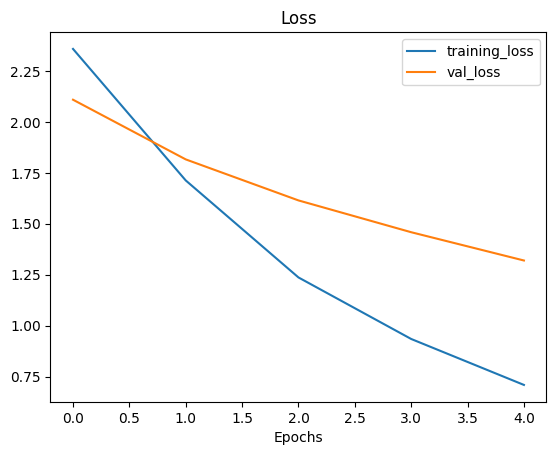

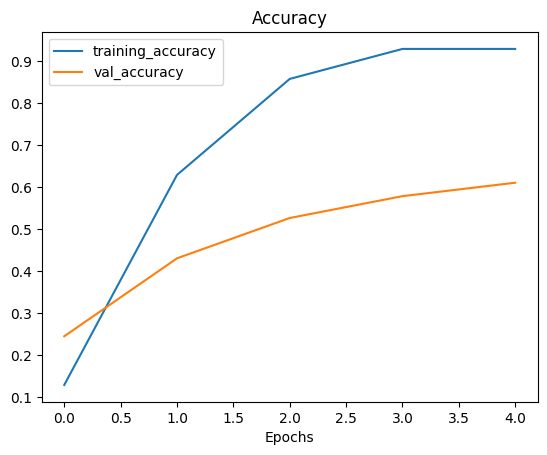

In [35]:
plot_loss_curves(model_2_history)

In [36]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs = tf.keras.layers.Input(input_shape, name = 'input_layer') 
x = data_augmentation(inputs, training = True)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs=  tf.keras.layers.Dense(10, activation = 'softmax', name='output_layer')(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])

In [37]:
checkpoint_path = '10_percent_model_checkpoints_weights/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)
initial_epochs=5

In [38]:
model_3_history=model_3.fit(train_data_10_percent,
            epochs=initial_epochs,
            steps_per_epoch=len(train_data_10_percent,),
            validation_data=test_data_10_percent,
            validation_steps=len(test_data_10_percent),
            callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_data_augmented'), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented/20230611-102704
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.5440 - accuracy: 0.5120
Epoch 1: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 35s 1s/step - loss: 1.5440 - accuracy: 0.5120 - val_loss: 0.8807 - val_accuracy: 0.7680
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.7187 - accuracy: 0.8120
Epoch 2: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 47s 2s/step - loss: 0.7187 - accuracy: 0.8120 - val_loss: 0.6764 - val_accuracy: 0.8028
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5581 - accuracy: 0.8293
Epoch 3: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 998ms/step - loss: 0.5581 - accuracy: 0.8293 - val_loss: 0.6081 - val_accuracy: 0.8164
Epoc

In [39]:
model_3.evaluate(test_data_10_percent)

79/79 [==============================] - 20s 241ms/step - loss: 0.5697 - accuracy: 0.8264


[0.5697355270385742, 0.8263999819755554]

In [40]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

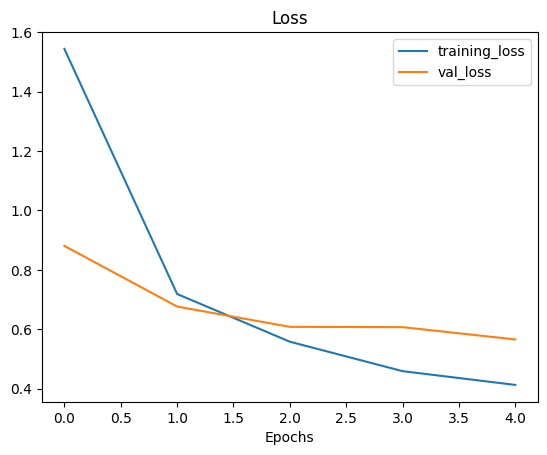

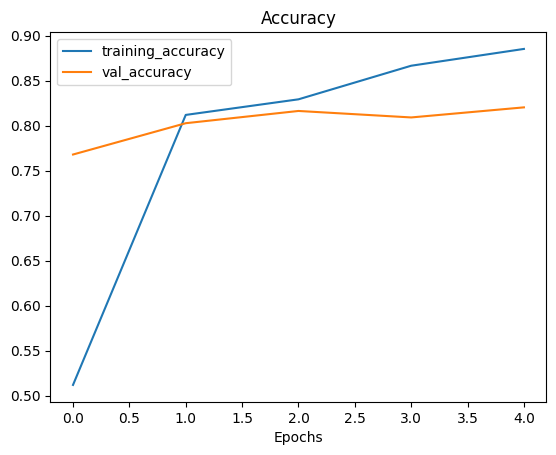

In [41]:
plot_loss_curves(model_3_history)

In [42]:
model_3.load_weights(checkpoint_path)

In [43]:
model_3.evaluate(test_data_10_percent)

79/79 [==============================] - 16s 198ms/step - loss: 0.5638 - accuracy: 0.8252


[0.56376713514328, 0.8252000212669373]

In [44]:
model_4 = model_3
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [45]:
for layer in model_4.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fea6677e110> True
<keras.engine.sequential.Sequential object at 0x7fea6aedd450> True
<keras.engine.functional.Functional object at 0x7fea665b9d20> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fea666cd180> True
<keras.layers.core.dense.Dense object at 0x7fea66263700> True


In [46]:
for i, layer in enumerate(model_4.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [47]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

model_4.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [68]:
fine_tune_epochs= initial_epochs + 5

In [49]:
model_4_history = model_4.fit(train_data_10_percent,
                              epochs = fine_tune_epochs,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data_10_percent,
                              validation_steps=len(test_data_10_percent),
                              initial_epoch=model_3_history.epoch[-1],
                              callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_fine_tuning')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning/20230611-103113
Epoch 5/10
24/24 [==============================] - 35s 1s/step - loss: 0.3332 - accuracy: 0.9013 - val_loss: 0.5207 - val_accuracy: 0.8252
Epoch 6/10
24/24 [==============================] - 18s 752ms/step - loss: 0.2719 - accuracy: 0.9253 - val_loss: 0.5288 - val_accuracy: 0.8232
Epoch 7/10
24/24 [==============================] - 19s 788ms/step - loss: 0.2131 - accuracy: 0.9387 - val_loss: 0.5281 - val_accuracy: 0.8256
Epoch 8/10
24/24 [==============================] - 19s 795ms/step - loss: 0.1924 - accuracy: 0.9533 - val_loss: 0.5177 - val_accuracy: 0.8324
Epoch 9/10
24/24 [==============================] - 18s 770ms/step - loss: 0.1795 - accuracy: 0.9533 - val_loss: 0.5204 - val_accuracy: 0.8296
Epoch 10/10
24/24 [==============================] - 17s 731ms/step - loss: 0.1480 - accuracy: 0.9680 - val_loss: 0.5485 - val_accuracy: 0.8232


In [50]:
model_4.evaluate(test_data_10_percent)

79/79 [==============================] - 13s 165ms/step - loss: 0.5386 - accuracy: 0.8340


[0.5385957956314087, 0.8339999914169312]

In [53]:
def compare_histories(original_history, new_history, initial_epochs=5):
  acc = original_history.history['accuracy']
  loss =  original_history.history['loss']
  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  total_acc=acc+new_history.history['accuracy']
  total_loss=loss+new_history.history['loss']
  total_val_acc=acc+new_history.history['val_accuracy']
  total_val_loss=loss+new_history.history['val_loss']

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training & Validation Accuracy')

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training & Validation Loss')

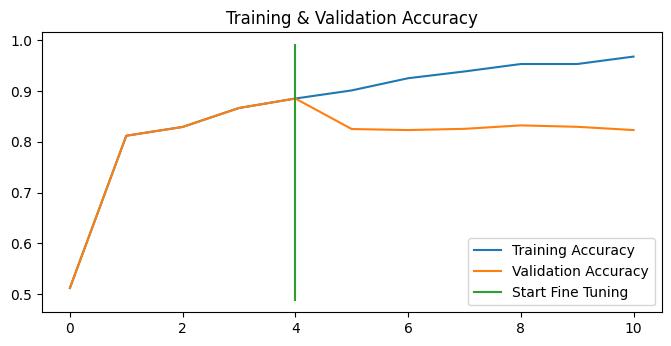

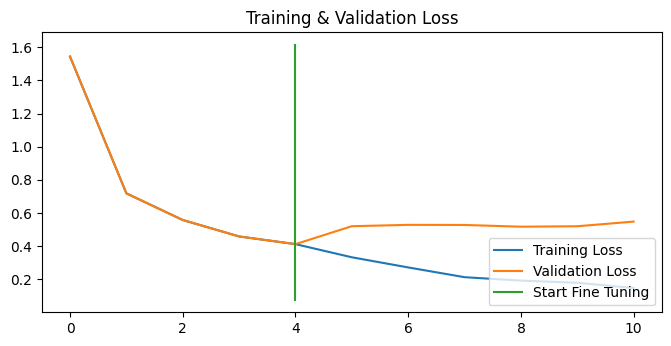

In [54]:
compare_histories(model_3_history, model_4_history, initial_epochs=5)

In [55]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2023-06-11 10:36:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  76.8MB/s    in 7.4s    

2023-06-11 10:36:13 (66.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [62]:
dir_path = '10_food_classes_all_data'
train_dir_path_3 = dir_path + '/train'
test_dir_path_3 = dir_path + '/test'

In [63]:
walk_through_dir(dir_path)

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [64]:
train_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_path_3,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE)

test_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_path_3,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [65]:
model_5=model_3
model_5.evaluate(test_data_all_data)

79/79 [==============================] - 12s 143ms/step - loss: 0.5436 - accuracy: 0.8240


[0.5435689687728882, 0.8240000009536743]

In [66]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

model_5.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [70]:
model_5_history = model_5.fit(train_data_all_data,
                              epochs = fine_tune_epochs,
                              steps_per_epoch=len(train_data_all_data),
                              validation_data=test_data_all_data,
                              validation_steps=len(test_data_all_data),
                              callbacks=[create_tensorboard_callback('transfer_learning', 'fine_tuning_all_data'), checkpoint_callback],
                              initial_epoch = model_3_history.epoch[-1])

Saving TensorBoard log files to: transfer_learning/fine_tuning_all_data/20230611-111937
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.5811 - accuracy: 0.8164
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 60s 226ms/step - loss: 0.5811 - accuracy: 0.8164 - val_loss: 0.4075 - val_accuracy: 0.8732
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.4773 - accuracy: 0.8480
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 48s 200ms/step - loss: 0.4773 - accuracy: 0.8480 - val_loss: 0.3752 - val_accuracy: 0.8824
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.4285 - accuracy: 0.8608
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 44s 185ms/step - loss: 0.4285 - accuracy: 0.8608 - val_loss: 0.3572 - val_accur

In [71]:
model_5.evaluate(test_data_all_data)

79/79 [==============================] - 13s 161ms/step - loss: 0.3320 - accuracy: 0.9016


[0.33195921778678894, 0.9016000032424927]

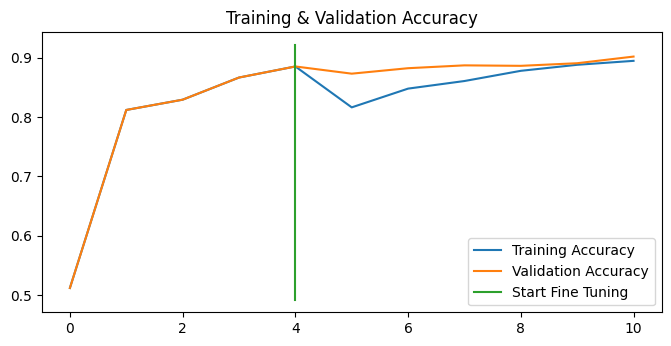

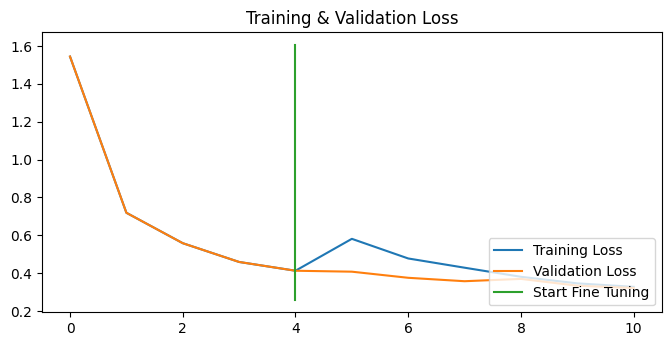

In [72]:
compare_histories(model_3_history, model_5_history)

In [74]:
!tensorboard dev upload --logdir ./transfer_learning --name 'Transfer Learning Experiments With 10 Food1010 Classes' --description 'A series of different transfer learning experiments with varying amounts of data and transfer learning types' --one_shot

2023-06-11 11:32:45.828999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   TLSP-FPZM



New experiment created. View your TensorBoard at: https://tensorboard.dev/ex

In [75]:
!tensorboard dev list

2023-06-11 11:42:04.902219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/RsaebioKSj2m6ZvX5YzVbQ/
	Name                 Transfer Learning Experiments With 10 Food1010 Classes
	Description          A series of different transfer learning experiments with varying amounts of data and transfer learning types
	Id                   RsaebioKSj2m6ZvX5YzVbQ
	Created              2023-06-11 11:33:30 (8 minutes ago)
	Updated              2023-06-11 11:33:35 (8 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4574433
Total: 1 experiment(s)
